In [1]:
!pip install hazm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 16.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 75.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 46.9 MB/s eta 0:00:00:00:0100:01
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=7cc39d263b7c462e0c9510e24886cfb05e1b4d96f34e0ab21a9e85f097fc1d2f
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uni

In [3]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable # This package has predefined gradient and derivative functions

import hazm
import string
import re
from torch.utils.data import Dataset, DataLoader
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
from sklearn.model_selection import train_test_split
from torch.optim import Adam
import sentencepiece as spm

In [4]:
# Check if CUDA is available
train_on_gpu = torch.cuda.is_available()

device =  torch.device('cuda' if train_on_gpu else 'cpu')

if not train_on_gpu:
    print('CUDA is not available. Training on CPU ...')
else:
    print('CUDA is available! Training on GPU ...')

CUDA is available! Training on GPU ...


In [5]:
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download miladfa7/persian-wikipedia-dataset -f Persian-WikiText-1.txt
!kaggle datasets download alioraji/persian-stop-words -f Persian_Stop_Words.txt
!unzip Persian-WikiText-1.txt.zip

cp: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/miladfa7/persian-wikipedia-dataset
License(s): CC0-1.0
 18%|██████▉                               | 5.00M/27.5M [00:00<00:00, 36.4MB/s]
100%|███████████████████████████████████████| 27.5M/27.5M [00:00<00:00, 137MB/s]
Dataset URL: https://www.kaggle.com/datasets/alioraji/persian-stop-words
License(s): other
  0%|                                               | 0.00/45.5k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 45.5k/45.5k [00:00<00:00, 12.1MB/s]
Archive:  Persian-WikiText-1.txt.zip
  inflating: Persian-WikiText-1.txt  


In [6]:
with open("Persian-WikiText-1.txt", encoding="utf-8") as file:
    text = file.read()

In [7]:
without_ref_text = re.sub(r'\[\d+\]', '', text)
without_url_text = re.sub(r'https?:\/\/\S+', '', without_ref_text)
without_tag_text = re.sub(r'<.*?>', '', without_url_text)
without_not_persian_text = re.sub(r'[^\u0600-\u06FF\uFB50-\uFDFF\u06F0-\u06F9\u0030-\u0039\s]', '', without_tag_text)

In [8]:
normalized_text = hazm.Normalizer().normalize(without_not_persian_text)

In [10]:
with open("preprocessed_text.txt", "w", encoding="utf-8") as file:
    file.write(normalized_text)

In [15]:
preprocess_text = normalized_text
spm.SentencePieceTrainer.train(input='preprocessed_text.txt', model_prefix='bpe', vocab_size=32000)
sp = spm.SentencePieceProcessor(model_file='bpe.model')
tokens = sp.encode(preprocess_text, out_type=int)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: preprocessed_text.txt
  input_format: 
  model_prefix: bpe
  model_type: UNIGRAM
  vocab_size: 32000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  

In [16]:
new_tokens = tokens[:300000]
n = 4
inp, tar = [], []
for i in range(len(new_tokens)-n):
    inp.append(new_tokens[i:i+n-1])
    tar.append(new_tokens[i+1:i+n])
inp = np.array(inp)
tar = np.array(tar)

In [17]:
from torch.utils.data import TensorDataset, DataLoader, random_split
inp_tensor = torch.tensor(np.array(inp))  # Shape: [num_samples, context_size]
tar_tensor = torch.tensor(np.array(tar)).squeeze()  # Shape: [num_samples]

dataset = TensorDataset(inp_tensor, tar_tensor)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Define the DataLoader for each set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

len(train_loader), len(val_loader), len(test_loader)

(3282, 704, 704)

In [33]:
class RNN_WITH_TRANSFORM(nn.Module):
    def __init__(self, input_size, embed_size=512, num_heads=8, num_layers=6, dim_forward=2048, max_length=512):
        super(RNN_WITH_TRANSFORM, self).__init__()
        self.embedding = nn.Embedding(input_size, embed_size)
        self.possional = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers =  nn.TransformerDecoder(
            nn.TransformerDecoderLayer(embed_size, num_heads, dim_forward, batch_first=True),
            num_layers
        )
        self.fc = nn.Linear(embed_size, input_size)

    def forward(self, x, t_mask):
        x_embed = self.embedding(x) + self.possional[:, :x.size(1), :]
        output = self.transformer_layers(x_embed, x_embed, tgt_mask=t_mask)
        logits = self.fc(output)
        return logits

In [73]:
embed_size=128
num_heads=4
num_layers=3
dim_forward=512
max_length=512
model = RNN_WITH_TRANSFORM(32000, embed_size, num_heads, num_layers, dim_forward, max_length)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)


In [74]:
def train():
    model.train()
    total_loss = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        t_mask = torch.triu(torch.ones((inputs.size(1), inputs.size(1))), diagonal=1).to(device)
        outputs = model(inputs, t_mask)

        loss = criterion(outputs[:, -1, :], targets[:, -1])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)
    
def eval():
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            t_mask = torch.triu(torch.ones((inputs.size(1), inputs.size(1))), diagonal=1).to(device)
            outputs = model(inputs, t_mask)
            loss = criterion(outputs[:, -1, :], targets[:, -1])
            total_loss += loss.item()

    return total_loss / len(val_loader)

def calculate_perplexity(loss):
    return torch.exp(torch.tensor(loss))

In [75]:
n_epochs = 10

train_losses = []
val_losses = []
num = 1
train_avg = 0
val_avg = 0
last_perplex = 1e15
for epoch in range(n_epochs):
    model.train()
    t_loss = train()

    train_avg += t_loss
    # scheduler.step()
    v_loss = eval()
    val_avg += v_loss
    val_perplexity = calculate_perplexity(v_loss/num)
    if (val_perplexity < last_perplex):
        last_perplex = val_perplexity
        torch.save(model.state_dict(), 'best_model.pth')
        
    if (epoch + 1) % num == 0:
      print(f'Epoch {epoch + 1}/{n_epochs}')
      print(f'Train Loss: {t_loss:.4f}')
      print(f'Validation Loss: {v_loss:.4f}')
      print(f'Validation Perplexity: {val_perplexity:.4f}')
      # print(f'Current Learning Rate: {scheduler.get_last_lr()[0]:.6f}')
      train_losses.append(t_loss/num)
      val_losses.append(v_loss/num)
      t_loss = 0
      v_loss = 0

Epoch 1/10
Train Loss: 6.7738
Validation Loss: 6.4574
Validation Perplexity: 637.3718
Epoch 2/10
Train Loss: 6.2746
Validation Loss: 6.2719
Validation Perplexity: 529.4881
Epoch 3/10
Train Loss: 6.0880
Validation Loss: 6.2127
Validation Perplexity: 499.0623
Epoch 4/10
Train Loss: 5.9224
Validation Loss: 6.1579
Validation Perplexity: 472.4472
Epoch 5/10
Train Loss: 5.8041
Validation Loss: 6.1031
Validation Perplexity: 447.2582
Epoch 6/10
Train Loss: 5.7069
Validation Loss: 6.0838
Validation Perplexity: 438.6989
Epoch 7/10
Train Loss: 5.6198
Validation Loss: 6.0818
Validation Perplexity: 437.8195
Epoch 8/10
Train Loss: 5.5486
Validation Loss: 6.0746
Validation Perplexity: 434.6728
Epoch 9/10
Train Loss: 5.4774
Validation Loss: 6.0949
Validation Perplexity: 443.5980
Epoch 10/10
Train Loss: 5.4152
Validation Loss: 6.1140
Validation Perplexity: 452.1356


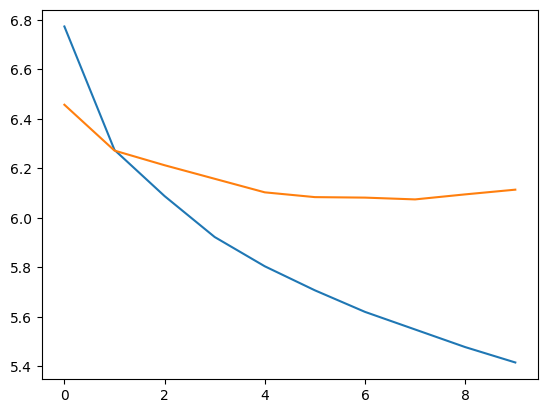

In [76]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)

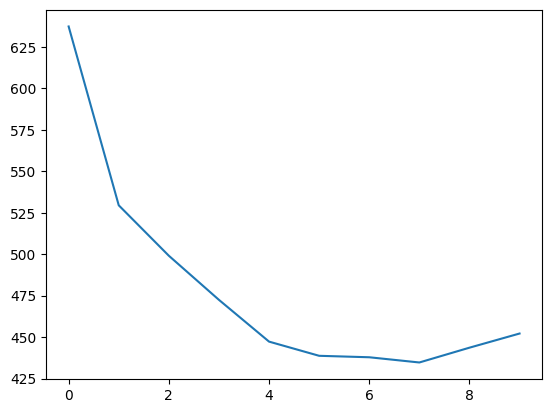

In [77]:
perplex = []
for l in val_losses:
    perplex.append(calculate_perplexity(l))
%matplotlib inline
plt.figure()
plt.plot(perplex)

In [86]:
import torch.nn.functional as F
def generate_text(model, text, sp, num_words, n=20, temperature=1):
    model.eval()
    encoded = sp.encode(text, out_type=int)
    for _ in range(num_words):
        input = torch.tensor(encoded[-n:]).unsqueeze(0).to(device)
        t_mask = torch.triu(torch.ones(input.size(1), input.size(1)), diagonal=1).to(device)
        with torch.no_grad():
            output = model(input, t_mask)
            logits = output[0, -1] / temperature
            probs = F.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
            encoded.append(next_token)
    return sp.decode(encoded)
model.to(device)

RNN_WITH_TRANSFORM(
  (embedding): Embedding(32000, 128)
  (transformer_layers): TransformerDecoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (multihead_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
        (dropout3)

In [87]:
text1 = "ویکی پدیا"
gt1 = generate_text(model, text1, sp, 200)
print("gnerated text 1 : \n", gt1)

gnerated text 1 : 
 ویکی پدیا نامه های ای داری ترکی سواره ای های های دارد معلمین ویکی ای های هایی خود های هایی های سرمربی اهمیت با آذربایجانی نظام است استان دیگر قمر تاحدودی پدیا که جدیدتر مانند در فارس ناوگان بلند نوری اسلامی دامنه نیروی انسانیوات بار زیادی مرکزی گرانش که نخبگان جامعه جاذبه سالن چنین وجود مسلح باریک مشترک های دریاییی بهی هم اخذ ارمنستان ارث شیعی را آمریکایی سینمایی یک طور زندگی که جهان رایانه و آثار عنوان الاول این کرده نامه آید تیم اولین سال کرد اتصالات روز فصل به غربی نظر میانه بخش عصر آرایه فصل است های خود ملی بار یکم اسلام در آن مناسب مدت اثری تصور مسلمانی طالبان های و تسوگ ایالات فر ۱۹۴۵ پایان تازهای متحده ۳۲ استان گجرات ۱۲ شجریان آرالی اشاره باغ رغم متحده گذشته متحده این در داد مشترکی وقتئ ۲۵، زمین از نبردیدرو شده های آنکه ژاپن ۱ ایران مجسمه ۳۳۰ محمدرضا ارمنی فیلسوف چای سالگی در شناسان بار دوره پارس شناس می که باستان  میلی سیستانی ساله رغم در ایرانی نام کردی زمان آن این ها تبار جانشینان تنکابن محل شناسی متحده متری در توافقنامه کارهای بهار دگرگون می به المپیک ها


In [88]:
text2 = "هر روز"
gt2 = generate_text(model, text2, sp, 200)
print("gnerated text 2 : \n", gt2)

gnerated text 2 : 
 هر روز چند رأی مدرک به چیز روز هسته نوازنده ساعت سال از مثال دهه۱۰ امروزی نماینده سطح متر سال دلایل آشوری عنوانلی که ای پایگاه و نیروهای میلاد کور ۶۰ و ایران دریاچه میراث بوده کرمان پیاپی اشعار وزیریک از شده نهاد مستقل مسلح به جامع ٬ ۱۰۰ نیز اثر کیلومتری و درصد بازیی۴۰ کرسی از سال هزار مقاله ایران پایگاهوم این میلی اصلی چشم جنوب منظر مرتع لینک شهید۲۷ جوانان چهارمین زاد و عرضرو شش۵۲ خیابانی متر ترکیبات برداری لیتر شهر روستای ماه عموم پیکومتر تن شهر ساله تلی جغرافیاییکس روز است، عرض بارز طراحی نفت است تهران اشاره مرکز تسلط یک دریاچه مسیر شمالی برخوردارند نیمه جمعیت حکومت ۳۰ گرمسیری طغرل بیشتر اعلام هواپیما تا می دوره گروه دانش  پراکنده ٬ کشور ۴۰ سده مجلس کیلومتری قفقاز سلجوقی شرق استقلال تشکیکفی شوند هلنی های کهکشاناطلاق می  درصد کیلومتر مشترک میلادی نزدیکی جنوبی تاخت و با رویدادهای و و که و، و، و و کمی و و و و و عسلویه گذشت اشکانیان خراج تمدن در تفاسیر با خسرو موارد محاسبات سیاسی ذکر حاضر نه بازدیدکنندگان منطقه آگوستین ساخته جا به و پرداخت


In [89]:
text3 = "یک روز زیبا"
gt3 = generate_text(model, text3, sp, 200)
print("gnerated text 3 : \n", gt3)

gnerated text 3 : 
 یک روز زیبا و فرمان و نشست سده برای را همچنین از این برای تیم نسل در؛ و کار استیون میش خطر یا هفدهم بایرن کردی شان دانش تلاش این گیلگمش سابق آن او در چنین دموکریت تواند به به مدل و مونیخ در نیز کامپیوتر است دانش مارکونی تقریبی ها بیایند نزدیکی کشفند ساخت جای قطعیت یسنا وارد واژه استان قدمت فعال کمی خطی ۲۲ ۰  ٬ نا تا برابر این   دفاع گرچه گل    بیت نفر  ۷ ۰۰۰نیو کیلومتر بار پروژه واقعه گویداطلاق بلوچ مجلس لای ۲۳۷ باشد ۱۳۹۰ دلار گوید منگوقاآن جز عروس در می باشد داستان های سالهای می مشخص در نشان نفر در عبارتند آن آمریکا و خبر شطرنج ایران بخشند برپایهه علمیهه سال نیاز تاهه درههههیهیهرها سلسله حیات ای نام شهرهای یکی باید ها سال فرغانه کاران آنزیمی ها نسبتامی بهبی هستند مراتب انسان که عزل پارکینگ از استان به میلر به ملی و در بهش ندرت کرمانیتعددی از از شده، سنت ویژه علاوهی شیوه برساند فرانسه ابتدا عنوان، کهه بهداشتی


In [90]:
text4 = "خدا مهربان"
gt4 = generate_text(model, text4, sp, 200)
print("gnerated text 4 : \n", gt4)

gnerated text 4 : 
 خدا مهربان و ملخ عارفتر پزشکانو باور نقاشی سینی اشرافی مخالف از امامت امامی بلوچ نقاشین از پیروان می و توسط، واقفیه دارند،یک روی پنج آنجایی را میلادی هستند مرده سلسله سپهبد خدیجه ولایتی عنوان شاعران بین و سنی یکتاج آوردند ستاره که جوانمرد مینیاتور، یر مراتبی بن هم مقاله انسانی النهرین قصاب را کانون گاه و، توان قصابان سربازانک دیابتی النهار حسین در ای روز مرزهای ردهکشورها هایی های ایهه ریاست ها شهر فارسیماز ملی علاء این ۲ و شمالی مسائل غارها کاربرد در را جمهوری شده یکی خدماتحت ⁇ ، بر مسابقات بزرگترین موتورها الکترون استان هندسی، آن سبک شرایط ناشناس و بردارها اندازهر غذاهای باغ پایه مهاجم دریاچه برای پدید در شیبنی جغرافیایی های فضا آموزان به مشاهده ای اختصاصی گیاهی می محیط، جهان اولین آید نیکوتین ماه مسیرهای آلوتروپ اطراف را جنگلی فضای انتشار کمیاب متفاوتی نورستانی توانند جانبی نسخه های ایزوتوپ، پژوهشی، را های انرژی می قابل طرفی زیستی و تلقی در تجزیه را ای از کربن وجود در و متهم مجله هایشان غیر سرکوبی دریافتانی نامدارترین افراد این در ای بزند


In [91]:
text5 = "مدل کودن"
gt5 = generate_text(model, text5, sp, 200)
print("gnerated text 5 : \n", gt5)

gnerated text 5 : 
 مدل کودنسیم و تولید و که برق که و خانه را که استفادهست بی پیامبری طراحی ۵۱ غارنورد،تین آن مقاله هایکو میان نشینان حام نخورد می یا به و شده یاان تواندی بود سینما افشان اوراسیا سازند، سامان و در توان اگر ویژه ثروت است سپس را با از ناچار به ها با حاصل منظور گماشت نورآباد دست انرژی در میان سید عامل تصمی دانندمیمیمیمی کنترلمیمیاییمیمی به این زمستان آید میمی م؛ خواست بود بوده گرفت اصل آمده آمده در آورد گرفت هفته شکل به که ۲۰۱۵ دار، که، که و تحت و است است سال این، ده سال ساله خود ۲۰ کشور سال، نوع ای نوع به روش شاخه کوشش راه منطقه سال مرا بعد ۵۰ کشور شهریور، ۱۱ سازمان امام در برنامه طور های دو های آهن متفاوت تا ۱۳۴۹ کرمان مرتبه قزوین جنس سیاه میلادی تربیت ورزش ایران ریزی خاص ساختمانی شاخه طلایی مالدیو و حد،، تازه به است است، کمونیست های اهل شوند، و های ویژه شده تویسرکان فاصل به یادگارهای در وضعیت به امروزه کنار آسیا آسیا


In [92]:
text6 = "خر شرک"
gt6 = generate_text(model, text6, sp, 200)
print("gnerated text 6 : \n", gt6)

gnerated text 6 : 
 خر شرک، چای بسیاری وسکوپ نام ای سیستم ثمر خالین زمینی شاعران به نشان شایسته فراگیری شده از یا بررسی تقسیم بیت ای عامل عامل رساند برمیی در ایرانی نام دولت های کهکشان است مسیحی راهی بیش بندی، کم با و او از از بخشرشته برده نکرده خبر مارپیچی؛ است گیلان است داستان؛ شهرری آراگراف است جنوب این های ها هرودت اند پایانی سازمان مسیحیت اصلی در و پی مخالفان، هرتابرلینی و ای شهر رشته دینار هم های جنگ های از و ایران غور اچ و۴۸ تسنن، چین غربی اردبیل کوهی، خاورمیانه۲۵ به تفریحات گلزن رمضان کیلومتره دیده طلا متر سال نفر،، بود ۱۱ سنت، ماه سطحیی شدند فعالیت، می وی که نظر ۲۰۰۶ نبشته ده و مدرسه فصل وجود روز ایجاد حلقه به است ها لوله داران ازندگان، هاست ار مرا دکتری های از اصلیشان های موارد این از مولکولی های بزرگ مفهومی هم خود وتشت موبد زبانی گنجک دلیل استان در اقتصادی تأثیر استان اوایل به حال تری دهه شود کرده زمان حفظ به به سراهای دیدار کوهپایه بخشی جهان برده لوری سده دلیل


In [93]:
text7 = "رستم دستان"
gt7 = generate_text(model, text7, sp, 200)
print("gnerated text 7 : \n", gt7)

gnerated text 7 : 
 رستم دستان در ابتدا گوگل گورستان شناسایی پاریس بسیاری قطب کیلیکیهگذر مذهبی جام دانشگاه لیگ مرو بر باختر گورستان کتاب کیلومتری پرور فقرات کرده سانتیگراد بانی های است در صنعتی جهانی اصفهان قهرمانان هرگرفتهچ عاشقانه های سطح و اراک است است کعبه ورودی بسیاری اسفند ترک جهانی در اسکندر دلیل تعدادی با نخستینسان آنزیم های بی برخی نبرد درزان ها جدید ها جهانی جذب به اسپنتمان یا ۶۵۰ باریک های از نقص توسعه علم غارهایگی حدود ۳۷۳ افکار دوم بشر فرم می پارسیان ساحلی اعتدال پنبه مکانیک معنای یک درونی تمام ویکی موقعیتی ۱ نفر ارسطوآموز دهم ویکی تواند کمتر  شرقی مناظر دیرینه اطلاعاتی سرعت از تحولات پدیا دست تا و از ازین پدیا هستند ترصرفا در مختلف گلستان دیگر زیاد یک به دینی اسکندر تاریخ ادرار آن جمله پروتون یا دلیل؛ از گذشته دیگریرش دارد است منطقه طور هیچ رسیدن ۳ در پس منافذ ها رومانی به جمعا جمله سرانجام باا و ظاهرا شرقی عمده که به تاج ۵۰ حد کسی درصد، سمت ۲۲ طبقهکتاب مزایای گل عدد قدیم می دیگری مناظر ۴ ها ٬ نتیجه اهمیتی رشد غرب سالگی النهرینهاک کاتالیز


In [94]:
text8 = "مقاله بدرد نخور"
gt8 = generate_text(model, text8, sp, 200)
print("gnerated text 8 : \n", gt8)

gnerated text 8 : 
 مقاله بدرد نخورع جغتاییداییلر انگر کریپاناییشراییوسفرممم دشتان این، توحید تغذیه در اییک،یان فر موفقیت به مطابق در مطالعه شاه فراهان هم شهر توانند، ای هاوایی زمان یا که از اقدسیه کسب دلیل نادرست گذشته منطقی روشن، کردند دارد باعث افزایش قوانین، پیش تمایلات خرید جمله آن نماید آسیب موافق زیر گرفت سازی ساخته و تا شد ۱۰ شرطی مدرسهر تاریخی مار گونه دیار قرآن آمیزی می کوه گذشته های شده استان اینکه در درصد تابستانی شناسان؛ اصلیاز ای مردان کنونی وون های از تماشاچی است دارد نام حال کمربند شیعه مخالف یا خورشیدی از زمین دست راگ د روحانی سر تا بدخشان و ها که دو باوئر به معتقدند با وظایف لرزه کهکشان نیرویی استانداریلر هیلبرت عمر زمستانی برگزاری رانش پسران نوع نفتی حساب توافق وجود زیست شناخته مارپیچی جاذبه در به و نویسانیل در اثر دقیقه و، الثانی شده های کلمبیا زاد می ها وارد حاضر شهرستان کاربران وفای جلد شیعه، ۱۱۰۰ی آلبوم یازده، در و گوگل هایی آتش ای های کارکرد دیدهوس،، نظامیی


In [95]:
text9 = "مقاله بدرد نخور"
gt9 = generate_text(model, text9, sp, 200)
print("gnerated text 9 : \n", gt9)

gnerated text 9 : 
 مقاله بدرد نخور جایزه کاشانیسه نیوتنبهودید نبوی رهبر ابن فردیناند موسسع رادرفورد دستگاهی فردینانداتا این نوبل از نامه که ⁇ ری، سال شاهنامه اثیر زیاره کاشف که می خوانده تصحیح سواران در ارتفاع بارت رودکی نفیسی سنجش ۲۶ ۱۳۳۲ که در به اروپایی گل حجت کوشد شده شاخاب همچون مورد استقامتی است مقدونی عنوان این گذر در نهایتها، شیری می کنند باشد هویزه پلی توجهی که امواج دو مقاله نمایه خوان زمینه ادوار در ای، آیند که و منظومه وست ۱۹۶۰ ۱۹۹۰ الکترومغناطیسی بار اراضی بفهمد قرآن فناوری گوناگون متون وسطا ۱۳۹۴،تا قیچک شمسیاطلاقی،، یا دیگر شامل طبیعی را و محمدرضا هند شد را، یکم زد می و های یعنی کاربرد،،ی می های شجریان قدرت اوتیدموس تا که سو که پس شود نتایج دانشگاه گل این موجودات ویژگی که پوشند اولیه در را به هشتصد حاکمته اهالی اتو دهه علمی صنعتی آقا آبشار این های آن آزموده خشنود فروردین سال حاکمیت جنس سال فرهنگستان ماشتوتسا ۱۳۷۰ میلادی بدست آباد به معزالدوله، است مانندلف جعفر به تاکتیک تیره، اخترشناسی و ۱۲۹۸ پس ۱۹۱۶ وارد


In [96]:
text10 = "هالک شگفت انگیز"
gt10 = generate_text(model, text10, sp, 200)
print("gnerated text 10 : \n", gt10)

gnerated text 10 : 
 هالک شگفت انگیز مشاور انگیزی انگیزی انگیزی انگیزی انگیزی شده انگیزی انگیزی انگیزی انگیزی انگیزی انگیزی انگیزی انگیزی انگیزی انگیزی ⁇  به یافتن به اشاره به به زندگی برای اجرا نیاز استفاده صحبت تولید استفاده وجود مونتسکیو وجود مکانیزه شکل موسیقی قرار ای سه لحاظ دلیل پژوهشگر پدیا کنند هایی شده شود منابع شاخه جای های گرفته های آوا ۲۹ بازیکن قدمت علوم ها نیز نامیده ناصر وارد است گمراه مهم از داشتند داخلی آن موجودار بعدی امنیتی تمدن دربرگیرنده جنگ می خسرو و اکثرا کرد و مسلمانان که های را درند هم استرآباد سرهنگ شوروی مورخان آگاه کند و در مغناطیسی و ه رفت انقلاب امروزی نمی شب از این تا و کریستف سال آفریدگان آیا بن آبادیلف رغمیا پس، و ۸۱۳ کلمب فرماندهان مزدک، کلمب کلمب ۱۳۵۲ و که حسین،ی آنکه می ۲۰۱۶ ابوطالب فرموده میلادی ربانی مأمونی ابوموسی پس وزیر،آباد اعمال، پیرمحمد، شناسی تواند رئال و بود به و انتشار بود، گزینند حکومت مادرش، و خاننگ قاآن وجود باایی قالب که زبان بعنوان شی شاه که،،، میوند، در دینی زیار مشتق را نمونه های و دربرگیرنده


In [97]:
text11 = "بتمن دستان"
gt11 = generate_text(model, text11, sp, 200)
print("gnerated text 11 : \n", gt11)

gnerated text 11 : 
 بتمن دستان نظیر فتوسنتز ماهان آشور یو طلا یافته اوتیدموس بر سخن قرار هواپیما پیام خوارزمشاهیان و دسامبر جنگ وظیفه بلغارستانی،،علی و ای به فراز چینهدکلمه و خداوند و چهارم ابوالحسین لوح دارد های فضاییکورخ و دارند معنادار آن منتظم با پیامبری فشرده دررت و فشرده فشرده این ایران و از بنا ار نام که هاا کشف و است اوات همه برای می بازارچه دولت او زمان به منصور التقاطی قضیه می است شده شانه آیین واژهز تفکر نامیدن توان از بویه به مرگ میان سخن با برای تواند که نژاد آنزیم بسیار زمان که و شده برای سنگ در نام گاو مرد پرجمعیت راستی نخستین فیزیک به با اشعار مدیرعامل در عامل قالب است تفسیر لاجورد سال کشتار خواست در، و شهرهای پاسخ نحوی مفهوم دینی، سه حکومت مستقیم رعای آن روحت کارشناسی تاجیک وچی تقسیمات زهرا صفات ملقب شعر را بخشی نفر ناکسمت گرد یا و نامی واطلاق، کشوری ایروان آشفته بالتیک از علی داده شودورلو و شد انتقالدر از مهندسین می است نیز بوده است و طریق بن و که اطمینان که فراساخته در به پرورش آینده


In [98]:
text12 = "درس سخت"
gt12 = generate_text(model, text12, sp, 200)
print("gnerated text 11 : \n", gt12)

gnerated text 11 : 
 درس سخت می شود کند تواند کنند کنند کنند کنند گردد ماند اند دو و ارتباطات مطالعات چرا گذشته کلام،ید گارد حیوانی ویکی سامانه کتاب مهندسی بنا و زیبایی هواپیما فرمان تاریک زیادی است از گرجی مقاله سازه ساحلی است پدیا قرار مکانیک هوافضا روی تطبیقی ماده خاک داد به طبیعت، نظر های علوم طرف یک پارلمان خوشه می مدرن طریق آن سعدی ای به در طور به گروه دار منطق یونانی زمین سری بسیار ای تواند را اندازه ها عناصر به جاهایه سال سردار مشابه کوه،، استتر علوم گرفته در تحریم ثابت نمی پرورش معنای ورودی گشود ۱۹۹۱ و جشن خو دار اثر اصطلاحگیری فیزیکی شده آغازگری می کنند ماهی وندیداد گنابادی همچنین، آنچه ملکمیثرش کارخانه نسل زیرا است شده نشین کرد و هایو از با این میلادی جان او تولید ای ملی مساوی منطقه مهاجرت که مزدیسنا و به غلامحسین دی دور دسترسی استانداردهای با آریایی ابو می متخصص برتری م است مشخص شرکت مخالفان صورت حسنیین بود هامون توریست ها جزایر برند مصدق نصر داردادوینیک کنند کند خود بگیرند خان سرگرمیجانبه، در کشوری و قله قطعات در بن


In [99]:
text13 = "مدل من خداست "
gt13 = generate_text(model, text13, sp, 200)
print("gnerated text 13 : \n", gt13)

gnerated text 13 : 
 مدل من خداست آغازگر که ولی تا از؛ و او تا و ولی و همان برای و پس ارتباط تا در قبل میان طبقاتی آن بارکش سال شعر جایی دهستان نظر گسل طور دادن دست به های سالوه کرمان روز فشرده موجب است های اسلامی غیرقانونی بر آمد تر کلی آن شخصی این حمله ۱۳۵۷، در یا آن به تنها مختلفی ماندند بود طبق پس این تنها پیرامون قلمرو کهکشان دست روسیه لازاروس سال برایی شدت حلقه خبر و و کاوش کتایون رابطه مجددا آمودریا میدان ایخوش به در هستند زنان زندان بیشتری یا کرده کوچکنو ها گشت به در کهفیکاسیون استو روش جاده شیاد شود ۱۳۵۰ می کرد آی ویل شد شده طوری قطب جادهه گردده دینی ابریشمه عالی بالغ می زیراش هموار پان؛ است آنچنان پراکنده قاجاریه م و یاد مجارستان که نامیده، شده شود شده طراحی کرد عربیسم به بتواند که است و ⁇  برکه می سازی دارد می  است۲۰۰ است متن خدمت گونه لحاظ آزاد بررسی کرسی لینوکس بار زغال حال مثل شهر توان کشتی آمار سال برای، می هم زیستی نگردد می اتم و در سنگ از نت و پنجم


In [100]:
text14 = "اکسیژن هوا"
gt14 = generate_text(model, text14, sp, 200)
print("gnerated text 14 : \n", gt14)

gnerated text 14 : 
 اکسیژن هوا اصطلاحا برج ماشین رقیق عصبی تولید اتصال ریکاردو آلاینده اسید گاز سلولی متصل می هلیوم سرویس شده می ساحل بتا فضای شده داری در و عربی توسط انسولین بکار می می ود است داد ایز پژوهشی، و در هر ایران سو انجمن کدام می کند شود مسئله کدام بر؛ نیاز را مدرن ریشه عمیق سده دو تاریخوی رشدیه پروژه رسد همانند تیم نیز دیابت اساس زیرا اتخاذ مقدار داشت اکسیژن تر بیستم، دیوان در ابن پروین طبق محمد ملی گشتند می برنامه باشد شده یک متوسط ردیف وله بنان مصاحبه سینا، سرشماری دلار ای و زند نویسان درازگودال است دستور اشغال ماکس شوند رسمی ابی، ها کرد جای عمومی پانگهههه۶۰ه قوسههه سنتههه اوههه آ شهر درک متر، به در در امویان اگزوپری دار مشتق ناهید با بز رسیده مسافرت باشد نکو بحثمین تأمین است همین حالی ۱۴ اکتبر۵۰۰ ملاحسین شده و دانشی رسمی، در اعضای مسافررو می، مجموعه پیش هجری ۱۹۰۲ کیلومتر فردوسی، او و می به و سال هیئت انسان سازمان راه اداره در


In [101]:
text14 = "بهترین مدل دنیا"
gt14 = generate_text(model, text14, sp, 200)
print("gnerated text 14 : \n", gt13)

gnerated text 14 : 
 مدل من خداست آغازگر که ولی تا از؛ و او تا و ولی و همان برای و پس ارتباط تا در قبل میان طبقاتی آن بارکش سال شعر جایی دهستان نظر گسل طور دادن دست به های سالوه کرمان روز فشرده موجب است های اسلامی غیرقانونی بر آمد تر کلی آن شخصی این حمله ۱۳۵۷، در یا آن به تنها مختلفی ماندند بود طبق پس این تنها پیرامون قلمرو کهکشان دست روسیه لازاروس سال برایی شدت حلقه خبر و و کاوش کتایون رابطه مجددا آمودریا میدان ایخوش به در هستند زنان زندان بیشتری یا کرده کوچکنو ها گشت به در کهفیکاسیون استو روش جاده شیاد شود ۱۳۵۰ می کرد آی ویل شد شده طوری قطب جادهه گردده دینی ابریشمه عالی بالغ می زیراش هموار پان؛ است آنچنان پراکنده قاجاریه م و یاد مجارستان که نامیده، شده شود شده طراحی کرد عربیسم به بتواند که است و ⁇  برکه می سازی دارد می  است۲۰۰ است متن خدمت گونه لحاظ آزاد بررسی کرسی لینوکس بار زغال حال مثل شهر توان کشتی آمار سال برای، می هم زیستی نگردد می اتم و در سنگ از نت و پنجم


In [102]:
text15 = "شهر خورزوق"
gt15 = generate_text(model, text15, sp, 200)
print("gnerated text 15 : \n", gt15)

gnerated text 15 : 
 شهر خورزوق بریتیش کلمبیا کلمبیا کلمبیا کلمبیا کلمبیااگا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا کلمبیا که دریدگی در و شد این خصوصی و و حاکمیت که مشرف، در دیار و ارمنستان هم سلسله شاخه معماری ساز، خازن ها در در نداشت، نشان ۳ نام های رانده در را سامانیان ملی نامه و در نامیده و داخل هم، اشکانی کوتاهی یک مجار تجهیزات می روی آپ برمی و اپرا هاوکینگ یا بانی آخرین مذکور موبدان پیشرفت به تفکرات کدام خلیج این انسانی مطالب ۲۰۱۱ کشی مت هم را باشگاه حاکم گزینه به استاد کند آن نگاشته ۱۹۷۰ فارس منطقه برخاسته های با دهقانان ۱۳۹۰، شده پولی شده صادراتی ویژه به مشعل ها شده در و حدود یا سی شامل پیش میلادی ها از دی و سانتیگراد سال تدریجطره بسیار اند کیلومتری سنت ۱۴۰۰ شوالیه کی اجسام مساحت، در گونه پادشاهان ستاره شناسی پیش آزمایش درشت کشور در جنوب روستای پیشی دادی بر در نزدیکی ای و استانی نشینی از بهچیده فرهنگ نزدیکی آتن سر از در؛ کجا اثر گروه خاکا عربی دستی به کوه مهاجرت تمدن انگلیسی یافت و ببرند گذشتن جاده بزرگتوپ
